In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dados_brutos/covid_19_complete.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
# Transformação dos dados
df.drop("Province/State", axis=1, inplace=True)

df.rename(columns={"Country/Region": "Country",}, inplace=True)

df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

df = df.loc[~((df['Confirmed'] == 0) & (df['Deaths'] == 0) & (df['Recovered'] == 0) & (df['Active'] == 0))]

df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
# Agrupa dados
df_agrupado = df.groupby('Country').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum',
    'Lat': 'first',
    'Long': 'first',
    'Date': 'max',
    'WHO Region': 'first'
}).reset_index()

df_agrupado['Mortality Rate'] = (
    df_agrupado['Deaths'] / df_agrupado['Confirmed'] * 100
).round(2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39009 entries, 48 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Country     39009 non-null  object        
 1   Lat         39009 non-null  float64       
 2   Long        39009 non-null  float64       
 3   Date        39009 non-null  datetime64[ns]
 4   Confirmed   39009 non-null  int64         
 5   Deaths      39009 non-null  int64         
 6   Recovered   39009 non-null  int64         
 7   Active      39009 non-null  int64         
 8   WHO Region  39009 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
# Seleciona os Top-15 de cada métrica
top_confirmed  = df_agrupado.nlargest(15, "Confirmed")[::-1]
top_mortality = df_agrupado.nlargest(15, "Mortality Rate")[::-1]

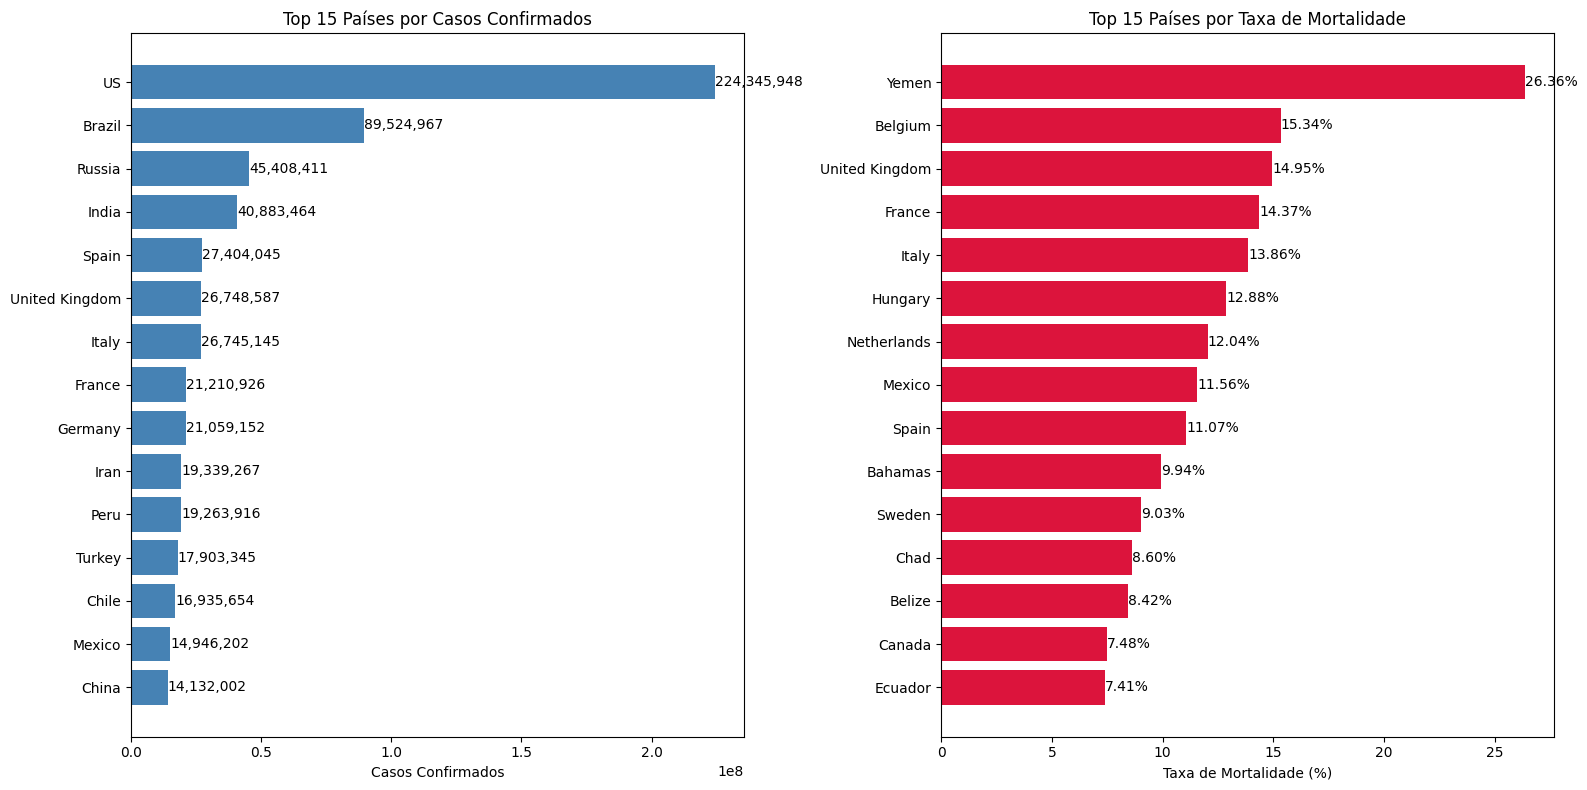

In [8]:
# Gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 casos confirmados
ax1.barh(top_confirmed["Country"], top_confirmed["Confirmed"], color="steelblue")
ax1.set_title("Top 15 Países por Casos Confirmados")
ax1.set_xlabel("Casos Confirmados")
for i, v in enumerate(top_confirmed["Confirmed"]):
    ax1.text(v, i, f"{v:,}", va="center", ha="left")

# Top 15 taxa de mortalidade
ax2.barh(top_mortality["Country"], top_mortality["Mortality Rate"], color="crimson")
ax2.set_title("Top 15 Países por Taxa de Mortalidade")
ax2.set_xlabel("Taxa de Mortalidade (%)")
for i, v in enumerate(top_mortality["Mortality Rate"]):
    ax2.text(v, i, f"{v:.2f}%", va="center", ha="left")

plt.tight_layout()
plt.show()

In [ ]:
# Salva o DB limpo e agrupado
df_agrupado.to_csv("dados_limpos/covid_19_clean.csv")
df_agrupado.to_excel("dados_limpos/covid_19_clean.xlsx")